In [1]:
from self_supervised.pipelines.representation_model import RepresentationModel, YoloEncoder

%reload_kedro
model_description = catalog.load("yolov5_l_description")
trained_model = catalog.load("trained_model")
#encoder = YoloEncoder(model_description=model_description)
#trained_model = RepresentationModel(encoder=encoder)
trained_model = trained_model.eval()

2023-03-06 12:26:38,526 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.10/site-packages/thop/profile.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.0.0"):

2023-03-06 12:26:38,526 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.10/site-packages/thop/profile.py:68: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) >= LooseVersion("1.1.0"):

2023-03-06 12:26:38,713 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-06 12:26:38,713 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/pyth

2023-03-06 12:26:38.985 | WARNING  | self_supervised.extras.datasets.pytorch_model_data_set:_load:42 - CUDA not available, automatically mapping variables to the CPU.


In [2]:
from pathlib import Path

dataset_path = Path("/home/daniel/lab_share/projects/CottonFlower2021/flower_dataset")
image_dir = dataset_path / "flower01" / "images"

In [17]:
from torchvision.io import read_image
from torchvision.transforms.functional import resize
from tqdm import tqdm
import torch

image_reps = []

image_list = sorted(list(image_dir.iterdir()))
for image_path in tqdm(image_list):
    image = read_image(image_path.as_posix())
    image.requires_grad = False
    image = resize(image, (512, 512))
    image = image.to(torch.float) / 255
    image_ex = image[None, :, :, :]
    
    image_reps.append(trained_model(image_ex)[0].detach().numpy())

  0%|                                                                                                                                                                                                                                                                                                                                        | 0/458 [00:00<?, ?it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│   13 │   image = image.to(torch.float) / 255                                                     │
│   14 │   image_ex = image[None, :, :, :]                                                         │
│   15 │                                                                                           │
│ ❱ 16 │   image_reps.append(trained_model(image_ex)[0].detach().numpy())                          │
│   17                                                                                             │
│                                                                                                  │
│ /home/daniel/git/self-supervised-learning/.venv/lib/python3.10/site-packages/torch/nn/modules/mo │
│ dule.py:1194 in _call_impl                                                                       │
│                                                                                                  │
│   1191 │   │   # this function, and just call forward.                                           │
│   1192 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1193 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1194 │   │   │   return forward_call(*input, **kwargs)                                         │
│   1195 │   │   # Do not call functions when jit is used                                          │
│   1196 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1197 │   │   if self._backward_hooks or _global_backward_hooks:                                │
│                                                                                                  │
│ /home/daniel/git/self-supervised-learning/src/self_supervised/pipelines/representation_model.py: │
│ 150 in forward                                                                                   │
│                                                                                                  │
│   147 │   │                                                                                      │
│   148 │   │   """                                                                                │
│   149 │   │   # Get the representations.                                                         │
│ ❱ 150 │   │   reps = [self.encoder(i) for i in images]                                           │
│   151 │   │   # Apply the projection.                                                            │
│   152 │   │   projected = [self.projection(r) for r in reps]                                     │
│   153                                                                                            │
│                                                                                                  │
│ /home/daniel/git/self-supervised-learning/src/self_supervised/pipelines/representation_model.py: │
│ 150 in <listcomp>                                                                                │
│                                                                                                  │
│   147 │   │                                                                                      │
│   148 │   │   """                                                                                │
│   149 │   │   # Get the representations.                                                         │
│ ❱ 150 │   │   reps = [self.encoder(i) for i in images]                                           │
│   151 │   │   # Apply the projection.                                                            │
│   152 │   │   projected = [self.projection(r) for r in reps

In [6]:
# Load flower counts.
import pandas as pd

labels_dir = dataset_path / "flower01" / "labels"
all_labels = []
labels_list = sorted(list(labels_dir.iterdir()))
for labels_path in labels_list:
    frame_labels = pd.read_csv(labels_path, sep=" ", names=["class", "x", "y", "width", "height"])
    frame_labels["frame"] = labels_path.name
    all_labels.append(frame_labels)
    
all_labels = pd.concat(all_labels, ignore_index=True)
all_labels

,class,x,y,width,height,frame
0,0,0.635938,0.238889,0.020833,0.037037,000001.txt
1,0,0.379427,0.065278,0.015104,0.034259,000001.txt
2,0,0.634375,0.245370,0.020833,0.037037,000002.txt
3,0,0.379948,0.068981,0.015104,0.034259,000002.txt
4,0,0.379948,0.069907,0.015104,0.034259,000003.txt
...,...,...,...,...,...,...
1987,0,0.495833,0.971759,0.030208,0.052778,000383.txt
1988,0,0.496875,0.976852,0.030208,0.046296,000384.txt
1989,0,0.497656,0.980093,0.028646,0.037963,000385.txt
1990,0,0.497135,0.986111,0.028646,0.027778,000386.txt


In [7]:
import numpy as np

# Create flower counts labels.
flower_counts = []
for image_path in labels_list:
    flower_counts.append(np.count_nonzero(all_labels["frame"] == image_path.name))
    
# Any missing counts are zeros.
for _ in range(len(flower_counts), len(image_reps)):
    flower_counts.append(0)

In [8]:
test_image_dir = dataset_path / "flower02" / "images"

test_image_reps = []

image_list = sorted(list(test_image_dir.iterdir()))
for image_path in tqdm(image_list):
    image = read_image(image_path.as_posix())
    image.requires_grad = False
    image = resize(image, (512, 512))
    image = image.to(torch.float) / 255
    image_ex = image[None, :, :, :]
    
    test_image_reps.append(trained_model(image_ex)[0].detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 333/333 [00:52<00:00,  6.37it/s]


In [9]:
test_labels_dir = dataset_path / "flower02" / "labels"
all_labels_test = []
labels_list = sorted(list(test_labels_dir.iterdir()))
for labels_path in labels_list:
    frame_labels = pd.read_csv(labels_path, sep=" ", names=["class", "x", "y", "width", "height"])
    frame_labels["frame"] = labels_path.name
    all_labels_test.append(frame_labels)
    
all_labels_test = pd.concat(all_labels_test, ignore_index=True)
all_labels_test

,class,x,y,width,height,frame
0,0,0.407813,0.032870,0.014583,0.023148,000001.txt
1,0,0.408854,0.042130,0.014583,0.023148,000002.txt
2,0,0.408854,0.042130,0.014583,0.023148,000003.txt
3,0,0.408854,0.042130,0.014583,0.023148,000004.txt
4,0,0.408854,0.042130,0.014583,0.023148,000005.txt
...,...,...,...,...,...,...
1583,0,0.441406,0.814352,0.020313,0.036111,000287.txt
1584,0,0.437240,0.838426,0.020313,0.036111,000288.txt
1585,0,0.433073,0.858796,0.020313,0.036111,000289.txt
1586,0,0.434635,0.871759,0.011979,0.028704,000290.txt


In [10]:
# Create flower counts.
test_flower_counts = []
for image_path in labels_list:
    test_flower_counts.append(np.count_nonzero(all_labels_test["frame"] == image_path.name))
    
# Any missing counts are zeros.
for _ in range(len(test_flower_counts), len(test_image_reps)):
    test_flower_counts.append(0)

In [11]:
# Create combined dataset.
all_image_reps = image_reps + test_image_reps
all_flower_counts = flower_counts + test_flower_counts
train_indices = np.arange(len(image_reps))
test_indices = np.arange(len(image_reps), len(all_image_reps))

In [12]:
from sklearn.linear_model import RidgeCV

all_flower_counts = np.array(all_flower_counts, dtype=float)
all_image_reps_arr = np.concatenate(all_image_reps, axis=0)

alphas = [1e-6, 1e-4, 0.01, 0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
reg = RidgeCV(alphas=alphas, cv=((train_indices, test_indices),)).fit(all_image_reps_arr, all_flower_counts)

In [13]:
test_image_reps_arr = np.concatenate(test_image_reps, axis=0)
test_preds = reg.predict(test_image_reps_arr)
test_preds

array([     1.6233,     0.63639,     0.67119,     0.91131,      1.0879,      1.1881,      1.8347,      1.4682,      1.1846,      1.2375,      1.9503,      1.2995,      1.6059,      1.5187,      1.8412,      2.2119,      2.3875,      2.2873,      1.3495,      1.1447,      1.4877,      1.6307,      2.3892,      2.6971,
            3.0966,       3.548,      2.8363,       2.656,      3.2543,       3.238,      3.0174,      3.7664,      3.4696,      3.3071,      3.4344,      2.4697,      3.9808,      3.4335,      3.7693,      3.4015,      3.2633,      3.3529,      3.3964,       4.185,      3.7695,      4.9899,      4.8612,      5.2231,
             4.446,      4.9777,      4.8136,       5.031,      4.5253,      4.5294,      4.8306,      4.3954,      4.7814,      4.2573,      4.2864,      4.7346,      5.0494,      5.1348,       5.351,      5.1155,      5.4633,      5.5122,      5.2551,      5.8053,      6.0055,      5.8736,      6.2265,      6.6138,
            6.5585,      6.2452,      6.3599,      7.4011,      7.5549,      7.2967,      7.1032,      6.8985,      6.9933,      6.4747,      7.2429,       6.495,      6.5005,      6.7465,      7.2668,      6.8234,      7.3089,      7.8514,      7.5696,      7.6984,       8.615,      7.8849,      8.3292,      8.9586,
            7.3982,      7.6831,      6.9241,      7.4307,      7.8212,      7.0569,      7.3687,      7.6758,      6.9448,      7.3251,      7.9239,      7.7812,      6.6711,      6.6283,      6.6385,      6.3668,      6.5287,      6.9637,      6.3734,       7.165,      7.7799,      6.8921,      6.9237,      6.0237,
            5.6227,      6.2741,      6.1863,      6.2696,      5.5483,      6.3305,      6.1203,      6.2666,      6.3979,       6.638,      6.7781,      6.1981,      6.7382,      6.8878,      6.7729,      6.2151,      6.3813,      7.4717,      6.6202,      7.2438,      6.6767,      6.8265,      6.0312,        6.49,
            5.9877,      6.5139,       6.272,      6.0981,       6.113,      6.7655,      6.9617,      6.9329,      6.3235,      5.8011,      5.6287,      5.9264,       5.431,      5.9675,       5.583,      5.8189,       6.611,      6.8398,      6.3628,      6.6863,      5.9906,      6.1896,      6.5899,      6.2191,
            6.2783,       5.406,      5.6973,      5.7071,      5.2174,      5.7544,      6.4554,      5.9199,      5.7597,       6.771,      7.0485,      6.6055,      6.4398,      6.2579,       6.802,      6.6385,      6.7052,      6.5777,       6.123,      6.3614,      7.0512,      6.7576,      7.2313,      6.7782,
            7.1773,      6.9567,      7.4641,      6.8988,      7.7486,      7.1367,       7.668,      8.3393,      9.1444,      7.1307,      7.5994,      7.0234,      6.9466,      7.8579,      8.3243,      7.3464,      8.1478,      7.7037,      8.1376,      7.8251,      7.9848,       7.994,      7.8323,      8.3459,
            7.3604,      7.9654,      7.6295,      6.4895,      6.7661,      6.1663,        6.13,      7.3719,      7.5254,      6.1041,      6.0732,      5.6715,      5.6021,      5.5693,      5.3668,      4.8226,      5.6364,      5.3711,      4.9523,      5.1133,      5.5204,      4.6407,      4.1607,      4.3469,
            4.6454,       5.714,      5.5568,      5.0235,      5.1379,      5.6761,      4.7021,      5.2396,      4.9835,      4.8471,      5.0292,      5.7343,      4.8036,       5.947,       5.932,      4.9469,      4.4217,      5.1039,      5.1903,      5.4717,      4.5797,      4.8223,      5.2797,      5.3578,
            4.6957,      4.4374,      4.4658,      4.3119,      4.8685,      4.2018,      4.0617,      4.2377,      4.5101,      3.6678,      3.5588,      3.1289,      2.7821,      2.5119,      2.8082,      3.1929,      3.0685,       2.758,      2.8109,      2.8838,      2.4962,        2.03,      2.0536,      1.9348,
            1.6178,      1.1092,      0.9211,      1.4558,      1.3002,      1.3698,     0.83957,     0.82663,     0.40961,      0.4802,     0.42907,     0.17122,     0.584

In [14]:
errors = test_preds - test_flower_counts
np.mean(np.abs(errors))

0.5749594350387385

2023-03-06 12:30:20,753 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.10/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-06 12:30:20,754 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)



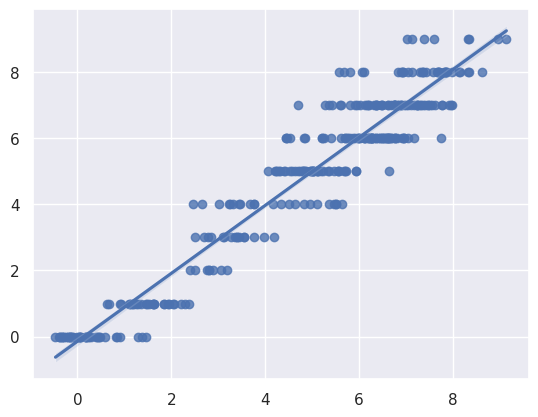

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

sns.regplot(x=test_preds, y=test_flower_counts)
plt.show()

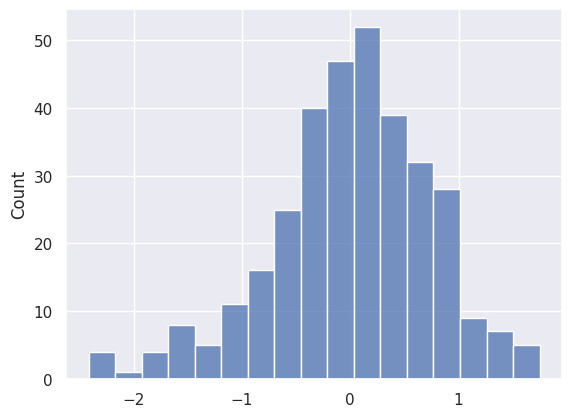

In [16]:
sns.histplot(x=errors)